<a href="https://colab.research.google.com/github/jonatan-dam/DAT255-Notebooks/blob/main/notebooks/02_fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image recognition on the Fashion MNIST dataset

Instead of classifying ten digits, let's try a slightly harder example: Classifying black-and-white images of fashion items. This dataset is known as the ["Fashion MNIST" dataset](https://keras.io/api/datasets/fashion_mnist/), due to its similarity to the original MNIST data.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

## Load the data
The dataset contains 60 000 training images and 10 000 testing images, from 10 different categories:

| Label | Description |
| ----- | ----- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [3]:
# Load the data and split it between train and test set
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale the images to the [0, 1] interval
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# We add the "channel" dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale the images to the [0, 1] interval
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

# Add the "channel" dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

If we look at the target values in `y_train`, we see that these have labels 0-9:

In [4]:
print(y_train.shape)
print(y_train[:5])

(60000,)
[9 0 0 3 0]


But, we rather want them to be _categorical_: instead of
```
y_train[0] -> 9
```
we want
```
y_train[0] -> [0 0 0 0 0 0 0 0 0 1]
```

### <span style="color: red;">Exercise:<span>
Convert the labels to categorical format, using the function `keras.utils.to_categorical`.

In [6]:
#y_train = ...   # TODO
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = ...
y_test = keras.utils.to_categorical(y_test, num_classes)

Now, let's get the image shape (width and height) by checking the first image:

In [7]:
image_shape = X_train[0].shape
print(image_shape)

(28, 28, 1)


Define the class names from the table above:

In [8]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

Plot the first few images.

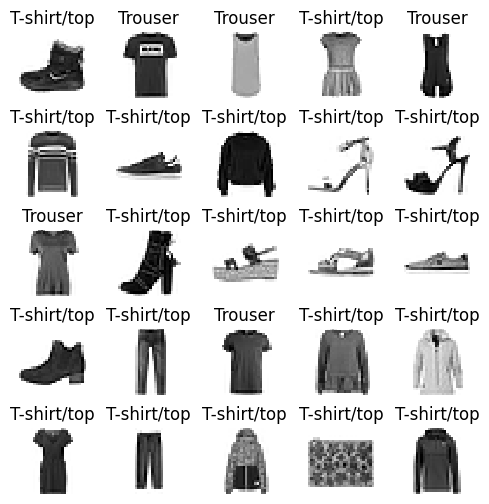

In [9]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[np.argmax(y_train[index])])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### <span style="color: red;">Exercise:<span>
Create a neural network yourself, using the Keras API.

In [ ]:
#model = ...     # TODO
ff_network = keras.models.Sequential({
    keras.
})

### Compile and train the network

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
batch_size = 128    # How many images to load in a single batch
epochs = 10         # How many times to iterate over the full dataset

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

### Plot the training performance

Let's plot the training performance as function of epoch number.

First, have a look at the contents of the `history` dictionary:

In [ ]:
print(history.history.keys())

Plot the training and validation loss:

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Plot the accuracy:

In [ ]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluate your model on the test data

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

### <span style="color: red;">Exercise:<span>
Try out different numbers of layers and different numbers of filters, to fint the best possible network. Train for as many epochs as you think is optimal (remember over- and underfitting).